<a href="https://colab.research.google.com/github/icedisk2009/zzolab_python_project/blob/main/10%EC%A3%BC%EC%B0%A8_%ED%95%99%EA%B8%89%EB%B3%84_%EC%A7%80%EC%9B%90%EC%9E%90%EC%88%98_%ED%8C%8C%EC%95%85%ED%95%98%EA%B8%B0(%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8)_%ED%95%98~%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글설문지 신청서 결과를 분석하기
- 방법1. csv파일을 업로드 후 분석
- 방법2. pandas의 groupby()사용후 분석
- 깃허브: https://github.com/icedisk2009/zzolab_python_project.git

## 방법1. csv 파일을 업로드후 분석
1) 일자(timestamp)만 추출하기

2) 일자별 지원자수 파악을 위해 일자를 리스트로 만들기
 - 문제점: '5-', '6-'으로 시작하는 일자를 슬라이싱하여 리스트에 저장했으나 결과적으로 '6-5', '6-5-'가 생성됨

3) 일자를 split('-')으로 분리후 리스트로 저장후 다시 묶어서 date에 저장한 리스트를 만듦
4) 딕셔너리를 만들어 key()에 중복값이 허용안되는 성질을 이용해 일자를 key로, 일자의 반복 횟수를 value로 저장함.
5) bar graph로 시각화 함



In [1]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from google.colab import files
data = files.upload()

Saving 2024_applicants_1.csv to 2024_applicants_1 (1).csv
Saving 2024_participants_1.csv to 2024_participants_1 (1).csv


In [4]:
import csv
data = csv.reader(open('2024_applicants_1.csv'))
print(data)

In [5]:
# timestamp만 추출하기
import csv
data = csv.reader(open('2024_applicants_1.csv'))
next(data)
app_time = []

for row in data:
    app_time.append(row[0])
print(app_time)

['5-29-2024 19:14:51', '5-29-2024 21:25:34', '5-30-2024 16:50:03', '5-30-2024 17:10:04', '5-30-2024 22:31:51', '5-30-2024 22:46:26', '5-31-2024 15:34:11', '5-31-2024 20:46:42', '6-1-2024 16:10:15', '6-2-2024 15:15:56', '6-2-2024 17:25:50', '6-2-2024 20:24:01', '6-2-2024 22:54:50', '6-2-2024 23:18:35', '6-2-2024 23:37:59', '6-3-2024 0:23:53', '6-3-2024 0:25:17', '6-3-2024 7:18:41', '6-3-2024 7:46:14', '6-3-2024 22:48:26', '6-3-2024 23:18:31', '6-4-2024 1:05:52', '6-4-2024 6:58:37', '6-4-2024 16:04:43', '6-4-2024 16:16:30', '6-4-2024 21:17:50', '6-4-2024 23:05:41', '6-5-2024 0:03:44', '6-5-2024 0:08:15', '6-5-2024 1:45:51', '6-5-2024 19:20:37', '6-5-2024 22:33:34', '6-5-2024 22:48:19', '6-5-2024 23:43:23', '6-5-2024 23:52:58', '6-5-2024 23:57:05', '6-5-2024 23:59:55']


### 날짜별 지원자수 파악하기

In [17]:
import csv
data = csv.reader(open('2024_applicants_1.csv'))
next(data)

# 지원일만 리스트로 만들기
apply_day = []
for row in data:
    if row[0] != '':
            apply_day.append(row[0][:9])
# print("지원일: ",apply_day)

dates= []
for day in apply_day:
    date = day.split('-')[0] + '-' + day.split('-')[1]
    dates.append(date)
print('지원일: ',dates)

# 일자별 지원자 수를 딕셔너리로 만들기
day_counts = {}
for day in dates:

    if day in day_counts:
        day_counts[day] +=1
    else:
        day_counts[day] =1
print('일자별 지원자 수: ', day_counts)


지원일:  ['5-29', '5-29', '5-30', '5-30', '5-30', '5-30', '5-31', '5-31', '6-1', '6-2', '6-2', '6-2', '6-2', '6-2', '6-2', '6-3', '6-3', '6-3', '6-3', '6-3', '6-3', '6-4', '6-4', '6-4', '6-4', '6-4', '6-4', '6-5', '6-5', '6-5', '6-5', '6-5', '6-5', '6-5', '6-5', '6-5', '6-5']
일자별 지원자 수:  {'5-29': 2, '5-30': 4, '5-31': 2, '6-1': 1, '6-2': 6, '6-3': 6, '6-4': 6, '6-5': 10}


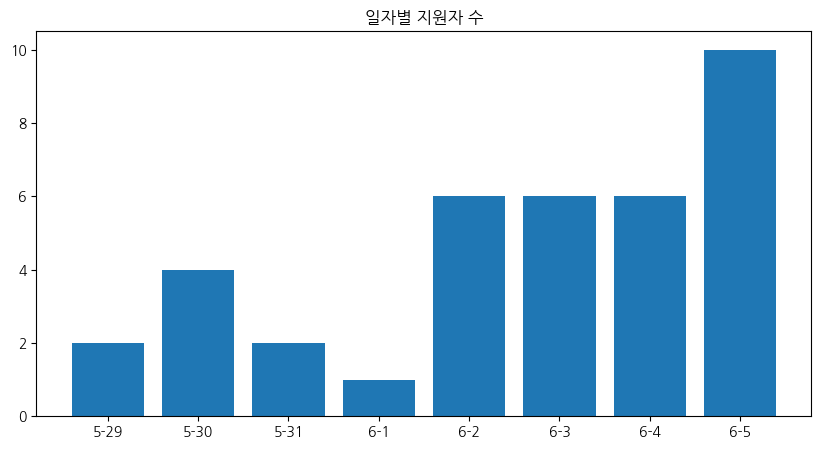

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('일자별 지원자 수')
plt.bar(day_counts.keys(), day_counts.values(), label ='지원자 수')
plt.show()

### 학급별 지원자수 파악하기

In [15]:
import csv
data = csv.reader(open('2024_applicants_1.csv'))
next(data)
st_nums = []

for row in data:
    if row[1] != '':
        st_nums.append(row[1][:3]) # 각 행 두번째열에서 첫 3자리까지 추출
st_nums = sorted(st_nums)
print("학년학급:", st_nums)

class_counts ={}
for num in st_nums:
    if num in class_counts: # 해당 학년 학급이 이미 딕셔너리에 있는지 확인하기
        class_counts[num] +=1 # 있으면 값을 1씩 증가
    else:
        class_counts[num] = 1 # 없으면, 새로운 키-값 쌍을 추가
print("학급별 신청자수:", class_counts)


# '학년- 학급', 한줄씩 출력하기
formatted_class_counts ={}
for key, value in class_counts.items():
    formatted_key = "{0}-{1}".format(key[0], key[1:])
    formatted_class_counts[formatted_key] = value

print('-----------------------------')
print('학급별 신청자 수는 다음과 같습니다.')
for key, value in formatted_class_counts.items():
    print("{}: {}".format(key,value))


학년학급: ['101', '101', '102', '102', '102', '102', '104', '104', '105', '105', '105', '105', '106', '106', '106', '107', '107', '108', '108', '108', '108', '108', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '207', '208', '209']
학급별 신청자수: {'101': 2, '102': 4, '104': 2, '105': 4, '106': 3, '107': 2, '108': 5, '110': 1, '111': 11, '207': 1, '208': 1, '209': 1}
-----------------------------
학급별 신청자 수는 다음과 같습니다.
1-01: 2
1-02: 4
1-04: 2
1-05: 4
1-06: 3
1-07: 2
1-08: 5
1-10: 1
1-11: 11
2-07: 1
2-08: 1
2-09: 1


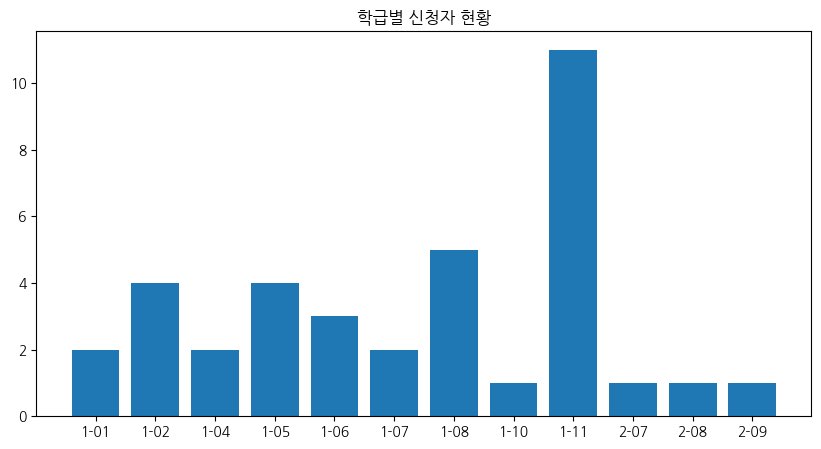

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,5))
plt.title("학급별 신청자 현황")
plt.bar(formatted_class_counts.keys(), formatted_class_counts.values(), label = '인원')
plt.show()

### pandas로 신청자_일자별 파악

pandas 라이브러리의 groupby()사용
- by: 그룹화할 기준이 되는 열 또는 열의 리스트

In [10]:
# pandas의 groupby()
import pandas as pd
data = pd.read_csv('2024_applicants_1.csv')
data['타임스탬프'] = pd.to_datetime(data['타임스탬프'])
data['신청일'] = data['타임스탬프'].dt.date
grouped_df = data.groupby('신청일')

In [11]:
daily__applicants_1 = grouped_df.size()
print(daily__applicants_1)

신청일
2024-05-29     2
2024-05-30     4
2024-05-31     2
2024-06-01     1
2024-06-02     6
2024-06-03     6
2024-06-04     6
2024-06-05    10
dtype: int64
